In [175]:
import json
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from collections import defaultdict
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers


In [176]:
file = open("systemCalibration.json")
data = json.load(file)

open System calibration file that contain the reading from the real world and reading from the camera

In [177]:
features = data['camera']
for i in features.items():
    for it, r in enumerate(i[1]):
        # print(r)
        # print(r)
        i[1][it] = list(r.values())


In [178]:

def train(train_x, train_y, theta, lr=0.01, epochs=10000):
    """ This functions uses the gradient decent algorithm to
    train given weights according to features and labels

    Returns: weight vector, loss list
    """
    loss = [] # track loss values
    n = train_x.shape[1]
    for e in range(epochs):
        h = np.matmul(theta, train_x)               # obtain neuron value
        j = np.sum((h-train_y)**2) / (2*n)          # find error
        dj = np.matmul(train_x, (h-train_y).T) / n  # differentia with respect to weights
        theta = theta - lr * dj.T                   # update weight values
        loss.append(j)                              # append loss to list
        
    # return trained weights and loss values
    return theta, loss

In [179]:

labels = defaultdict(list)
for record in data['real']:
    r = record.copy()
    ids = r['ids']
    r.pop('ids', None)
    for id in ids: 
        labels[id].append(list(r.values()))

In [180]:
# For X values
X = np.array(features["_0"])
Y = np.array(labels[0])
# print(Y[:, :1])
model1 = LinearRegression()
model1.fit(X[:,:2], Y[:,:2])
# xm = np.polyfit(X[:,1:2], Y[:,:1], 3)



LinearRegression()

R^2 Score :  0.33340963830565584


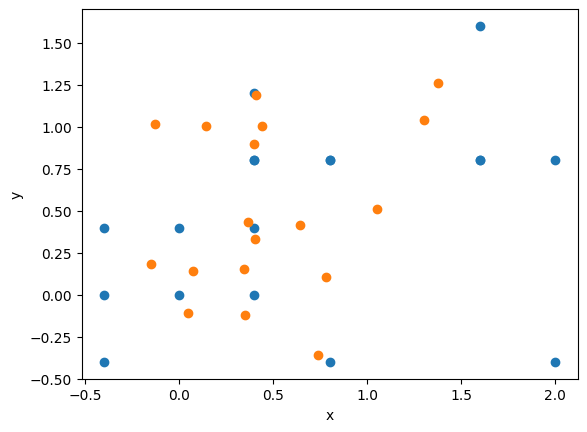

In [181]:

pred = model1.predict(X[:, :2])
plt.scatter(Y[:, :1], Y[:, 1:2])
plt.scatter(X[:, 1:2], X[:, :1])
# plt.scatter(pred[:, :1], pred[:, 1:2])
plt.xlabel("x")
plt.ylabel("y")
print("R^2 Score : ",r2_score(Y[:, :1], pred[:, :1]))


In [182]:
# model = tf.keras.models.Sequential()
horsepower_normalizer =  layers.Normalization(input_shape=[2,])
horsepower_normalizer.adapt(X[:,:2])
model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(units=2)
])
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_15 (Normaliza  (None, 2)                5         
 tion)                                                           
                                                                 
 dense_52 (Dense)            (None, 64)                192       
                                                                 
 dense_53 (Dense)            (None, 64)                4160      
                                                                 
 dense_54 (Dense)            (None, 2)                 130       
                                                                 
Total params: 4,487
Trainable params: 4,482
Non-trainable params: 5
_________________________________________________________________


In [183]:

model.predict(X[:,:2])
# model.fit(X, Y, epochs=100)

1/1 [==============================] - 0s 141ms/step


array([[-0.10774762,  0.04989721],
       [-0.16221881,  0.03869863],
       [-0.13978314,  0.12253758],
       [-0.14073662,  0.02494783],
       [ 0.02182995,  0.04262839],
       [-0.00797141,  0.02895622],
       [-0.04215616,  0.00358394],
       [ 0.0718175 ,  0.12033056],
       [-0.00778086,  0.01361788],
       [ 0.01022346,  0.01447087],
       [ 0.00130723,  0.00202055],
       [-0.27028534, -0.00209934],
       [-0.24443942,  0.01216926],
       [-0.02743229,  0.27823347],
       [ 0.07640892,  0.0172702 ],
       [-0.10900173,  0.08088677],
       [-0.1902873 ,  0.1642138 ],
       [-0.11229287,  0.34605727]], dtype=float32)

In [184]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [185]:

history = model.fit(
    X[:,:2],
    Y[:,:2],
    epochs=500,
    verbose=0)

In [190]:
model.predict(X[:,:2])

1/1 [==============================] - 0s 68ms/step


array([[-0.00384204,  0.01744553],
       [-0.38946703,  0.0089386 ],
       [ 1.6338736 ,  0.70065475],
       [-0.00349144,  0.41601628],
       [ 0.40220347,  0.00812619],
       [ 0.39679983,  0.40663105],
       [ 0.4025794 ,  0.79795134],
       [ 0.40271804,  1.2189751 ],
       [ 0.65032876,  0.7967414 ],
       [ 0.7982342 ,  0.7991155 ],
       [ 0.5498186 ,  0.796894  ],
       [-0.39762056, -0.38835204],
       [ 0.79440415, -0.38971886],
       [ 1.5903618 ,  0.1826131 ],
       [ 1.6009892 ,  0.80163866],
       [ 1.4015266 ,  0.79280204],
       [ 1.9933541 ,  0.7900138 ],
       [ 2.0070143 , -0.3073039 ]], dtype=float32)

In [187]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

KeyError: 'val_loss'

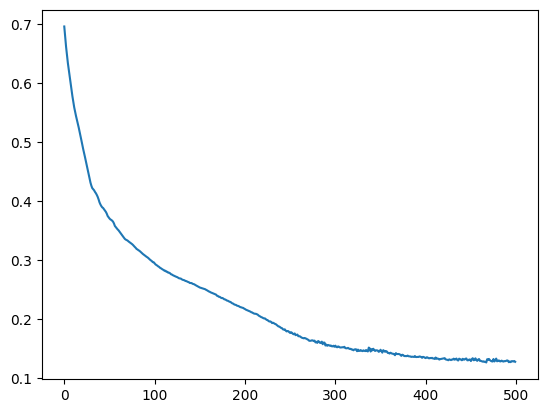

In [188]:
plot_loss(history)

In [191]:
model.predict([0.541796, 0.507114])

1/1 [==============================] - 0s 284ms/step


array([[1.0409752, 0.631442 ]], dtype=float32)